# Make main table and heatmap for comparisons

### import modules

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')

### get all outputs

In [2]:
table_list = [
    '../reports/tables/%s' % x for x in os.listdir('../reports/tables/')
    if x.endswith('.csv') and 'summary' not in x
]
table_list

['../reports/tables/cambridge_main_results.csv',
 '../reports/tables/facesfamous_main_results.csv',
 '../reports/tables/penandpaper_main_results.csv',
 '../reports/tables/emofaces_main_results.csv',
 '../reports/tables/faceattract_main_results.csv']

### collect all outputs and merge into one table

In [3]:
big_df = pd.DataFrame()
for csv in table_list:
    this_df = pd.read_csv(csv, index_col=[0, 1])
    big_df = pd.concat([big_df, this_df])
big_df.sort_index(inplace=True)
big_df

% correct   df      p  percentile  \
                 Unnamed: 1                                                
Face evaluation  Attractiveness        76.875000   45  0.720   64.379177   
                 Emotion recognition   88.095238   16  0.294   87.491950   
                 Eyes test             72.000000   49  0.425   21.000000   
                 Likability            43.750000   45  0.002    0.039227   
Face recognition CFMT 1               100.000000   26  0.561   72.955529   
                 CFMT 2                36.666667   26  0.002    0.020554   
                 CFMT 3                33.333333   26  0.033    0.978091   
                 Famous context        58.260870   26  0.029    0.810858   
                 Famous familiarity    31.304348   26  0.002    0.016127   
                 Famous naming         13.913043   26  0.029    0.836081   
Visuo-spatial    BLRD-A                33.000000  173  0.013    1.000000   
                 BLRD-B                38.000000  173  0.046    2.000000   
                 LPS2-Visual           48.000000  128  0.321   16.000000   

                                         t         z  
                 Unnamed: 1                           
Face evaluation  Attractiveness       0.36  0.368613  
                 Emotion recognition  1.08  1.149958  
                 Eyes test           -0.80 -0.811902  
                 Likability          -3.29 -3.358192  
Face recognition CFMT 1               0.59  0.611469  
                 CFMT 2              -3.40 -3.532865  
                 CFMT 3              -2.25 -2.334648  
                 Famous context      -2.32 -2.403991  
                 Famous familiarity  -3.47 -3.596492  
                 Famous naming       -2.31 -2.392772  
Visuo-spatial    BLRD-A              -2.52 -2.524022  
                 BLRD-B              -2.01 -2.017241  
                 LPS2-Visual         -1.00 -0.999991

### custom order for publication

In [4]:
ordered_df = big_df.iloc[[4, 5, 6, -5, -6, -4, 1, 2, 0, 3, -3, -2, -1]]
ordered_df

% correct   df      p  percentile  \
                 Unnamed: 1                                                
Face recognition CFMT 1               100.000000   26  0.561   72.955529   
                 CFMT 2                36.666667   26  0.002    0.020554   
                 CFMT 3                33.333333   26  0.033    0.978091   
                 Famous familiarity    31.304348   26  0.002    0.016127   
                 Famous context        58.260870   26  0.029    0.810858   
                 Famous naming         13.913043   26  0.029    0.836081   
Face evaluation  Emotion recognition   88.095238   16  0.294   87.491950   
                 Eyes test             72.000000   49  0.425   21.000000   
                 Attractiveness        76.875000   45  0.720   64.379177   
                 Likability            43.750000   45  0.002    0.039227   
Visuo-spatial    BLRD-A                33.000000  173  0.013    1.000000   
                 BLRD-B                38.000000  173  0.046    2.000000   
                 LPS2-Visual           48.000000  128  0.321   16.000000   

                                         t         z  
                 Unnamed: 1                           
Face recognition CFMT 1               0.59  0.611469  
                 CFMT 2              -3.40 -3.532865  
                 CFMT 3              -2.25 -2.334648  
                 Famous familiarity  -3.47 -3.596492  
                 Famous context      -2.32 -2.403991  
                 Famous naming       -2.31 -2.392772  
Face evaluation  Emotion recognition  1.08  1.149958  
                 Eyes test           -0.80 -0.811902  
                 Attractiveness       0.36  0.368613  
                 Likability          -3.29 -3.358192  
Visuo-spatial    BLRD-A              -2.52 -2.524022  
                 BLRD-B              -2.01 -2.017241  
                 LPS2-Visual         -1.00 -0.999991

### set decimal places and column order

In [5]:
clean_df = ordered_df[['% correct', 'percentile', 'z', 't', 'df', 'p']].copy()
clean_df.loc[:, '% correct'] = clean_df.loc[:, '% correct'].round(0).astype(int)
clean_df.loc[:, 'percentile'] = clean_df.loc[:, 'percentile'].round(0).astype(int)
clean_df.loc[:, 'percentile'] = [[str(x), '<1'][x < 1] for x in clean_df.loc[:, 'percentile']]
clean_df.loc[:, 'z'] = clean_df.loc[:, 'z'].round(2)
clean_df

% correct percentile     z     t   df  \
                 Unnamed: 1                                                   
Face recognition CFMT 1                     100         73  0.61  0.59   26   
                 CFMT 2                      37         <1 -3.53 -3.40   26   
                 CFMT 3                      33          1 -2.33 -2.25   26   
                 Famous familiarity          31         <1 -3.60 -3.47   26   
                 Famous context              58          1 -2.40 -2.32   26   
                 Famous naming               14          1 -2.39 -2.31   26   
Face evaluation  Emotion recognition         88         87  1.15  1.08   16   
                 Eyes test                   72         21 -0.81 -0.80   49   
                 Attractiveness              77         64  0.37  0.36   45   
                 Likability                  44         <1 -3.36 -3.29   45   
Visuo-spatial    BLRD-A                      33          1 -2.52 -2.52  173   
                 BLRD-B                      38          2 -2.02 -2.01  173   
                 LPS2-Visual                 48         16 -1.00 -1.00  128   

                                          p  
                 Unnamed: 1                  
Face recognition CFMT 1               0.561  
                 CFMT 2               0.002  
                 CFMT 3               0.033  
                 Famous familiarity   0.002  
                 Famous context       0.029  
                 Famous naming        0.029  
Face evaluation  Emotion recognition  0.294  
                 Eyes test            0.425  
                 Attractiveness       0.720  
                 Likability           0.002  
Visuo-spatial    BLRD-A               0.013  
                 BLRD-B               0.046  
                 LPS2-Visual          0.321

#### Save to file

In [6]:
clean_df.to_csv('../reports/tables/summary_table.csv')

Export for use in paper

In [7]:
clean_df.to_latex()

u'\\begin{tabular}{llrlrrrr}\n\\toprule\n                &                &  \\% correct & percentile &     z &     t &   df &      p \\\\\n{} & Unnamed: 1 &            &            &       &       &      &        \\\\\n\\midrule\nFace recognition & CFMT 1 &        100 &         73 &  0.61 &  0.59 &   26 &  0.561 \\\\\n                & CFMT 2 &         37 &         <1 & -3.53 & -3.40 &   26 &  0.002 \\\\\n                & CFMT 3 &         33 &          1 & -2.33 & -2.25 &   26 &  0.033 \\\\\n                & Famous familiarity &         31 &         <1 & -3.60 & -3.47 &   26 &  0.002 \\\\\n                & Famous context &         58 &          1 & -2.40 & -2.32 &   26 &  0.029 \\\\\n                & Famous naming &         14 &          1 & -2.39 & -2.31 &   26 &  0.029 \\\\\nFace evaluation & Emotion recognition &         88 &         87 &  1.15 &  1.08 &   16 &  0.294 \\\\\n                & Eyes test &         72 &         21 & -0.81 & -0.80 &   49 &  0.425 \\\\\n             

### make a heatmap with z-score differences between tests

get differences for each pairing

In [8]:
z_df = ordered_df.loc[:, ['z']]

diff_df = pd.DataFrame()
for i in z_df.index:
    this = z_df.loc[i, 'z']
    this_diff = z_df - this
    this_diff = this_diff.T
    this_diff.index = [[i[0]], [i[1]]]
    diff_df = pd.concat([diff_df, this_diff])

diff_df

Face recognition                      \
Unnamed: 1                                     CFMT 1    CFMT 2    CFMT 3   
Face recognition CFMT 1                      0.000000 -4.144333 -2.946117   
                 CFMT 2                      4.144333  0.000000  1.198217   
                 CFMT 3                      2.946117 -1.198217  0.000000   
                 Famous familiarity          4.207961  0.063627  1.261844   
                 Famous context              3.015460 -1.128873  0.069343   
                 Famous naming               3.004241 -1.140092  0.058124   
Face evaluation  Emotion recognition        -0.538490 -4.682823 -3.484606   
                 Eyes test                   1.423371 -2.720962 -1.522746   
                 Attractiveness              0.242856 -3.901477 -2.703261   
                 Likability                  3.969661 -0.174672  1.023544   
Visuo-spatial    BLRD-A                      3.135491 -1.008842  0.189374   
                 BLRD-B                      2.628709 -1.515624 -0.317407   
                 LPS2-Visual                 1.611460 -2.532873 -1.334657   

                                                                        \
Unnamed: 1                           Famous familiarity Famous context   
Face recognition CFMT 1                       -4.207961      -3.015460   
                 CFMT 2                       -0.063627       1.128873   
                 CFMT 3                       -1.261844      -0.069343   
                 Famous familiarity            0.000000       1.192501   
                 Famous context               -1.192501       0.000000   
                 Famous naming                -1.203720      -0.011219   
Face evaluation  Emotion recognition          -4.746450      -3.553950   
                 Eyes test                    -2.784590      -1.592089   
                 Attractiveness               -3.965105      -2.772604   
                 Likability                   -0.238300       0.954201   
Visuo-spatial    BLRD-A                       -1.072470       0.120031   
                 BLRD-B                       -1.579251      -0.386750   
                 LPS2-Visual                  -2.596501      -1.404000   

                                                       Face evaluation  \
Unnamed: 1                           Famous naming Emotion recognition   
Face recognition CFMT 1                  -3.004241            0.538490   
                 CFMT 2                   1.140092            4.682823   
                 CFMT 3                  -0.058124            3.484606   
                 Famous familiarity       1.203720            4.746450   
                 Famous context           0.011219            3.553950   
                 Famous naming            0.000000            3.542731   
Face evaluation  Emotion recognition     -3.542731            0.000000   
                 Eyes test               -1.580870            1.961861   
                 Attractiveness          -2.761385            0.781346   
                 Likability               0.965420            4.508150   
Visuo-spatial    BLRD-A                   0.131250            3.673981   
                 BLRD-B                  -0.375531            3.167199   
                 LPS2-Visual             -1.392781            2.149950   

                                                                          \
Unnamed: 1                           Eyes test Attractiveness Likability   
Face recognition CFMT 1              -1.423371      -0.242856  -3.969661   
                 CFMT 2               2.720962       3.901477   0.174672   
                 CFMT 3               1.522746       2.703261  -1.023544   
                 Famous familiarity   2.784590       3.965105   0.238300   
                 Famous context       1.592089       2.772604  -0.954201   
                 Famous naming        1.580870       2.761385  -0.965420   
Face evaluation  Emotion recognition -1.961861     

clean up

In [9]:
diff_df = diff_df.T.iloc[1:, :-1]
diff_df.index = diff_df.index.get_level_values(1)
diff_df.columns = diff_df.columns.get_level_values(1)

In [10]:
diff_df

,CFMT 1,CFMT 2,CFMT 3,Famous familiarity,Famous context,Famous naming,Emotion recognition,Eyes test,Attractiveness,Likability,BLRD-A,BLRD-B
Unnamed: 1,,,,,,,,,,,,
CFMT 2,-4.144333,0.000000,-1.198217,0.063627,-1.128873,-1.140092,-4.682823,-2.720962,-3.901477,-0.174672,-1.008842,-1.515624
CFMT 3,-2.946117,1.198217,0.000000,1.261844,0.069343,0.058124,-3.484606,-1.522746,-2.703261,1.023544,0.189374,-0.317407
Famous familiarity,-4.207961,-0.063627,-1.261844,0.000000,-1.192501,-1.203720,-4.746450,-2.784590,-3.965105,-0.238300,-1.072470,-1.579251
Famous context,-3.015460,1.128873,-0.069343,1.192501,0.000000,-0.011219,-3.553950,-1.592089,-2.772604,0.954201,0.120031,-0.386750
Famous naming,-3.004241,1.140092,-0.058124,1.203720,0.011219,0.000000,-3.542731,-1.580870,-2.761385,0.965420,0.131250,-0.375531
Emotion recognition,0.538490,4.682823,3.484606,4.746450,3.553950,3.542731,0.000000,1.961861,0.781346,4.508150,3.673981,3.167199
Eyes test,-1.423371,2.720962,1.522746,2.784590,1.592089,1.580870,-1.961861,0.000000,-1.180515,2.546290,1.712120,1.205339
Attractiveness,-0.242856,3.901477,2.703261,3.965105,2.772604,2.761385,-0.781346,1.180515,0.000000,3.726805,2.892635,2.385854
Likability,-3.969661,0.174672,-1.023544,0.238300,-0.954201,-0.965420,-4.508150,-2.546290,-3.726805,0.000000,-0.834170,-1.340951


separate into significant (z>+/-2) and non-significant differences

In [11]:
sig = diff_df[abs(diff_df) > 2.]
nsig = diff_df[abs(diff_df) <= 2.]

#### make the figure

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12), dpi=300)

mask = np.tri(sig.shape[0], k=-1).T
my_max = abs(sig).max().max()

sns.heatmap(
    sig,
    square=True,
    ax=ax,
    vmin=-my_max,
    vmax=my_max,
    annot=True,
    fmt='.1f',
    annot_kws={'fontsize': 16},
    cbar_kws={
        'label': 'z-score difference (row task minus column task)',
        'orientation': 'horizontal',
        'pad': 0.22
    },
    linewidths=0.5,
    mask=mask)

sns.heatmap(
    nsig,
    square=True,
    ax=ax,
    alpha=0.5,
    vmin=-my_max,
    vmax=my_max,
    #annot=True,fmt='.1f',annot_kws={'fontsize':10,'alpha':0.5},
    cbar=False,
    linewidths=0.5,
    mask=mask)

ax.set_xlabel('')
ax.set_ylabel('')

plt.suptitle('z-score comparison between tasks', fontsize=24, y=1.01)
plt.tight_layout()
plt.close()

In [13]:
fig.savefig('../reports/figures/overview_heatmap.png', dpi=300, bbox_inches='tight')

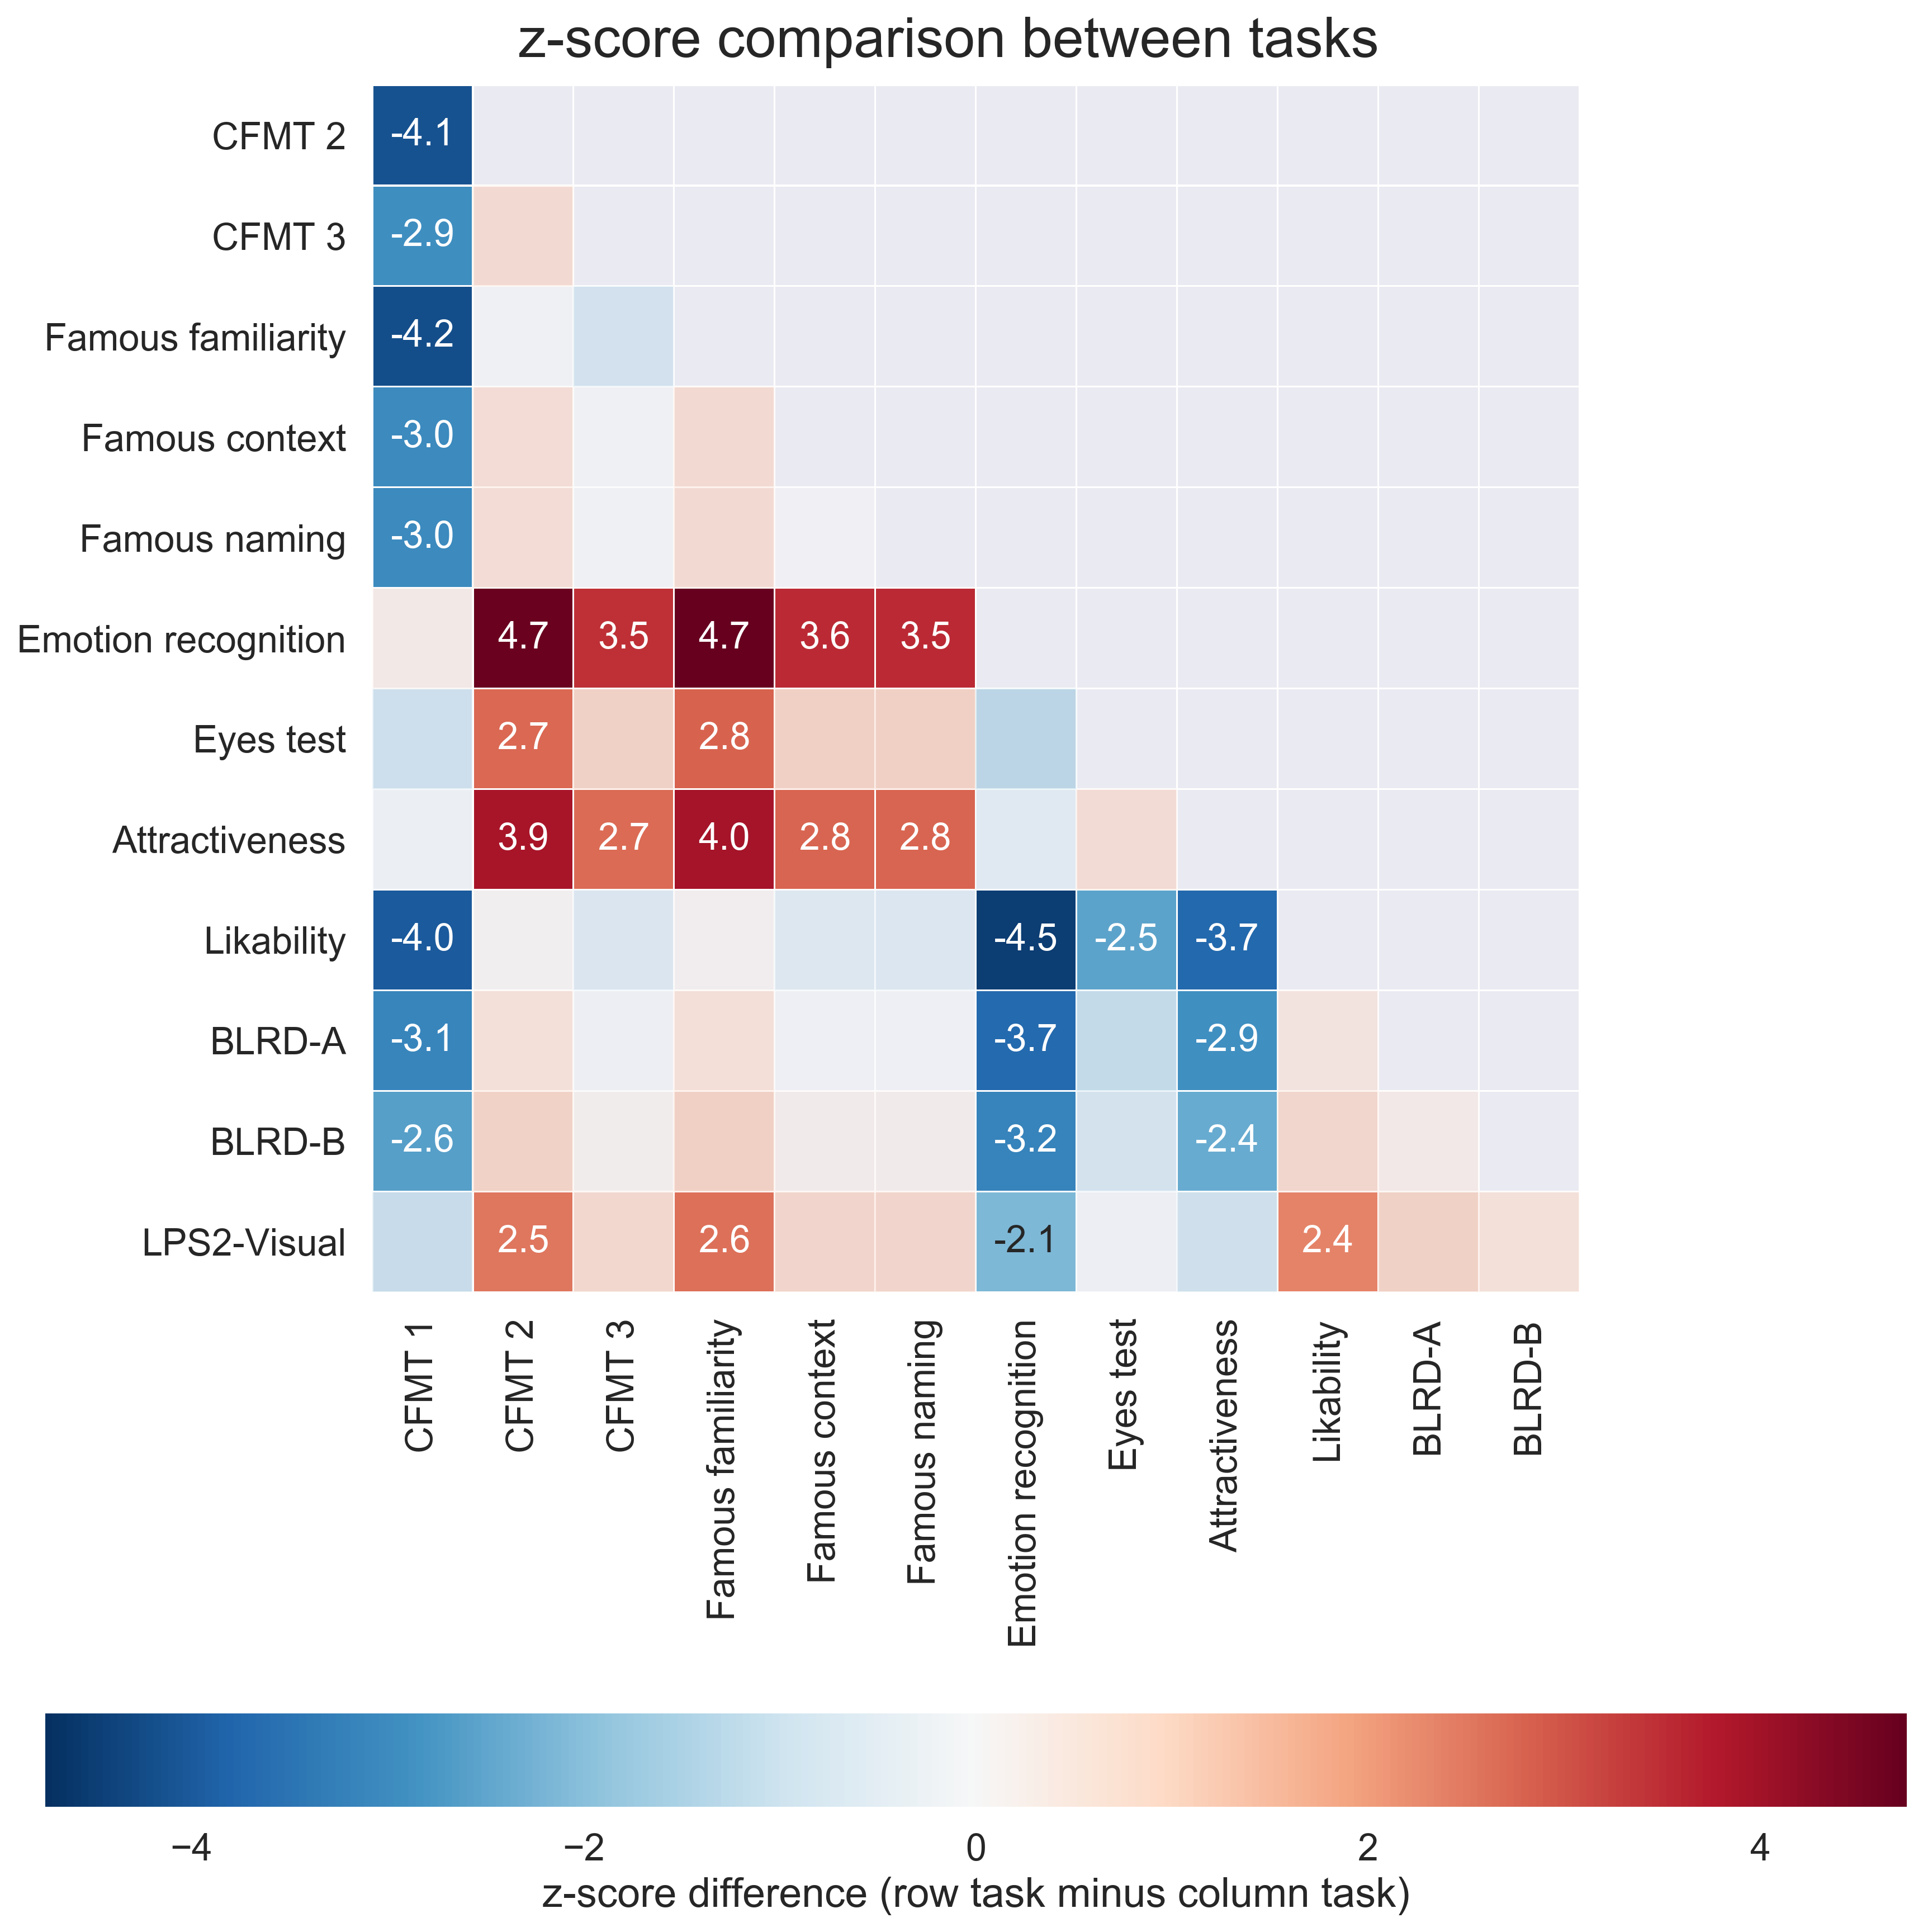

In [14]:
fig

The differences to the first part of the CFMT were between {{ '%.2f'% sig.loc[:,'CFMT 1'].min() }} and {{ '%.2f'% sig.loc[:,'CFMT 1'].max() }} .